In [9]:
'''
文字雲是以視覺化方式將文本中重要的詞彙凸顯出來，是快速分析文本重點的一種方法，文字雲作業提供重點詞彙的文字雲練習。延續著我們前一天的實作練習，將新聞中取出關鍵字進一步利用文字雲的方式呈現。

1. 當我們取出一堆斷詞後的關鍵字之後，你可以用什麼方法衡量哪些關鍵字是重要的呢？

'''


'/Users/chunweichang/Desktop/python class'

In [1]:
'''
2. 試著手動複製同一種類型的新聞文章存成一列一篇新聞的純文字格式（.txt）檔案，將作為接下來分析的語料來源。這個範例中我們採用 Yahoo 新聞中的「股市股匯」類型，請你改為其他類型的新聞資料。

美國升息的不確定因素消除，...
造型特殊的餅乾，運用超音波刀精細切割，...
央行升息，房貸利率隨之提高，傳出有房東因此調漲租金，...
...
'''

'''
3.在 Colab 中準備會使用到的套件與工具：
''' 

!pip install jieba # jieba 中文斷詞套件
!pip install wordcloud # wordcloud 文字雲視覺化套件
!pip install matplotlib # matplotlib 畫圖工具套件# txt檔案路徑



In [107]:
'''
4. 將準備好的新聞語料來源進行斷詞：
'''
import jieba
import wordcloud
import matplotlib

# txt檔案路徑
txt_file_path = "./data.txt"

# 載入檔案到變數中
with open(txt_file_path, "r")as fn:
    lines = fn.readlines()
    lines = list(map(lambda x: x.strip(),lines)) # 移除斷行字元

import wget
url = 'https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big'
wget.download(url)


'dict.txt.big'

In [114]:
# 載入套件與字典檔
import jieba
import jieba.analyse
jieba.set_dictionary('./dict.txt.big')
jieba.analyse.set_stop_words("./stopword.txt")

token_1 = list(map(lambda x: list(jieba.cut(str(x), HMM = False)), lines))


Building prefix dict from /Users/chunweichang/Desktop/python class/dict.txt.big ...
Loading model from cache /var/folders/ll/lb_b4vvx7cgfp2wpfsv4w6zm0000gn/T/jieba.u8bef5a7c8ce5d06321dcae22814e9fb3.cache
Loading model cost 1.268 seconds.
Prefix dict has been built successfully.


In [116]:
'''
5. 請將斷詞後的結果進行詞頻的計算存入 word_count 變數中，並且篩選出出現次數大於 5 次的字詞。

'''

word_count = {}
result = {}
for sent in token_1: # 放入斷詞之後的變數
    for word in sent:
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1 

word_count_5 = {}
for word, count in word_count.items():
    if count > 5 :
        word_count_5[word] = count
print(word_count_5)


{'新': 6, ' ': 23, '，': 79, '在': 10, '美國': 11, '的': 50, '為': 10, '並': 6, '(': 12, ')': 12, '。': 28, '表示': 11, '員工': 6, '、': 19, '和': 11, '包括': 8, '%': 9, '日': 6, '會': 7, '烏克蘭': 7, '加拿大': 7, '俄國': 6, '普': 6, '丁': 6, '2': 7, '將': 12, '制裁': 8, '4': 6, '月': 8, '及': 6, '.': 11}


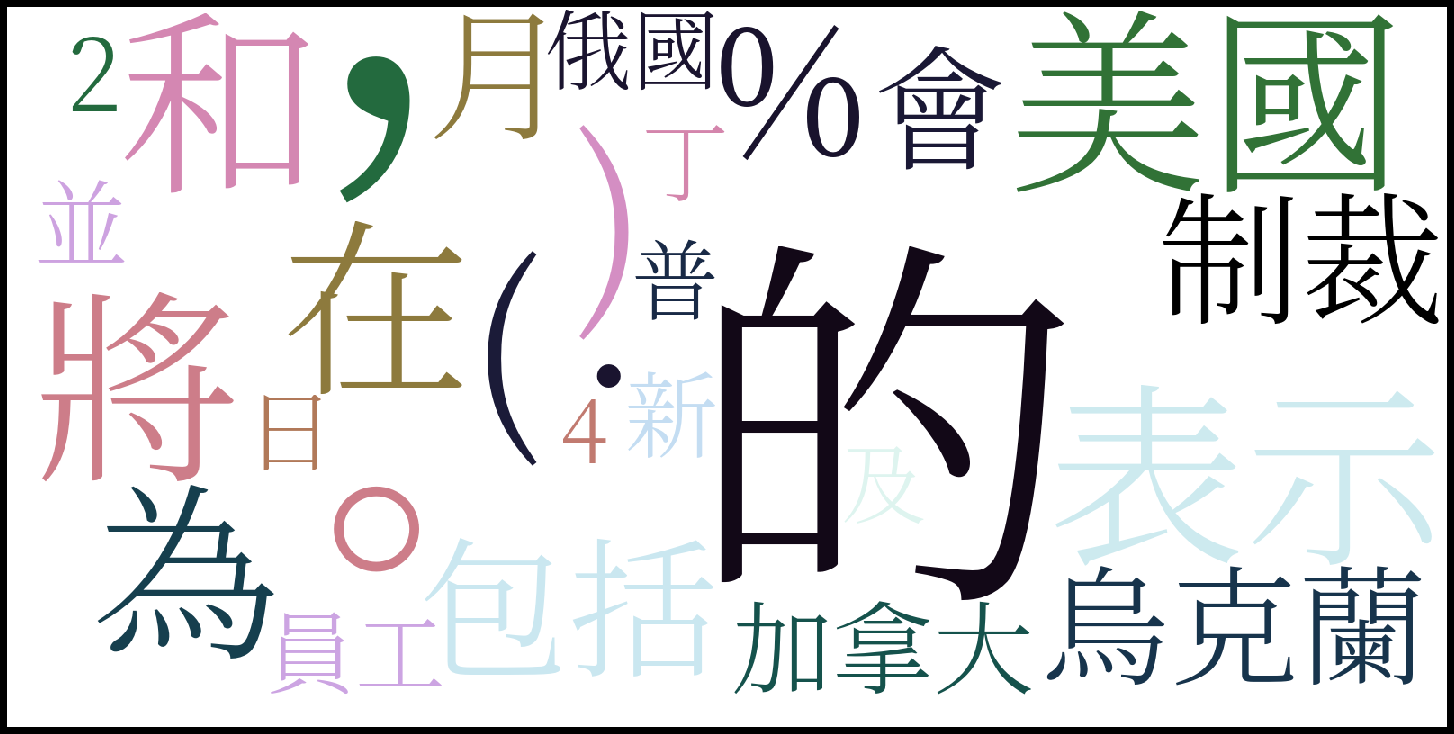

In [117]:
'''
6. 利用 wordcloud 套件將剛剛整理好的資料製作成文字雲圖：
'''

import wordcloud
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import wget
# 下載中文字型檔
word_type = 'https://github.com/odek53r/Data-Science-Camp/raw/main/SourceHanSerifK-Light.otf'
wget.download(word_type)

wordcloud = WordCloud(
        background_color = 'white',
        font_path = 'SourceHanSerifK-Light.otf', # 放入中文字型檔路徑
        colormap=matplotlib.cm.cubehelix,
        width = 1600,
        height = 800,
        margin = 2)

# wordcloud 套件 Input 需放入詞頻統計的 dict 型態變數
wordcloud = wordcloud.generate_from_frequencies(word_count_5) 
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [113]:
help(jieba)

Help on package jieba:

NAME
    jieba

PACKAGE CONTENTS
    __main__
    _compat
    analyse (package)
    finalseg (package)
    lac_small (package)
    posseg (package)

CLASSES
    builtins.object
        Tokenizer
    
    class Tokenizer(builtins.object)
     |  Tokenizer(dictionary=None)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, dictionary=None)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __repr__(self)
     |      Return repr(self).
     |  
     |  add_word(self, word, freq=None, tag=None)
     |      Add a word to dictionary.
     |      
     |      freq and tag can be omitted, freq defaults to be a calculated value
     |      that ensures the word can be cut out.
     |  
     |  calc(self, sentence, DAG, route)
     |  
     |  check_initialized(self)
     |  
     |  cut(self, sentence, cut_all=False, HMM=True, use_paddle=False)
     |      The main function that segments an entire sentence that